In [ ]:
# this workbook is for testing the neural network on a year's data and predicting data for a week

In [33]:
# Libraries

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing

mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['axes.grid'] = False

In [18]:
# Reading csv file to dataframe
df = pd.read_csv('2021.csv')
df = df[0::90] # only take every 90th row
df.head()

,year,month,day,hour,zone,longitude,latitude,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temperature,dewpt
0,2021,1,1,0,1,74.29,31.39,5,4058.84,30.40,42.16,0.00,9.78,395.20,484.22,26.35,5.6,4.3
90,2021,1,1,1,1,74.29,31.39,5,5447.39,63.48,44.55,0.00,12.16,488.46,585.86,27.11,5.4,4.5
180,2021,1,1,2,1,74.29,31.39,5,8117.68,135.90,48.67,0.00,16.69,658.20,779.81,33.44,4.4,4.4
270,2021,1,1,3,1,74.29,31.39,5,11856.08,243.19,59.63,0.05,21.46,863.67,1015.06,39.52,5.3,4.8
360,2021,1,1,4,1,74.29,31.39,5,12603.76,250.34,83.63,1.23,24.80,883.55,1027.48,41.54,5.7,4.6


In [19]:
# converting date time to pandas datetime
date_time=pd.to_datetime(df[['year','month','day','hour']])

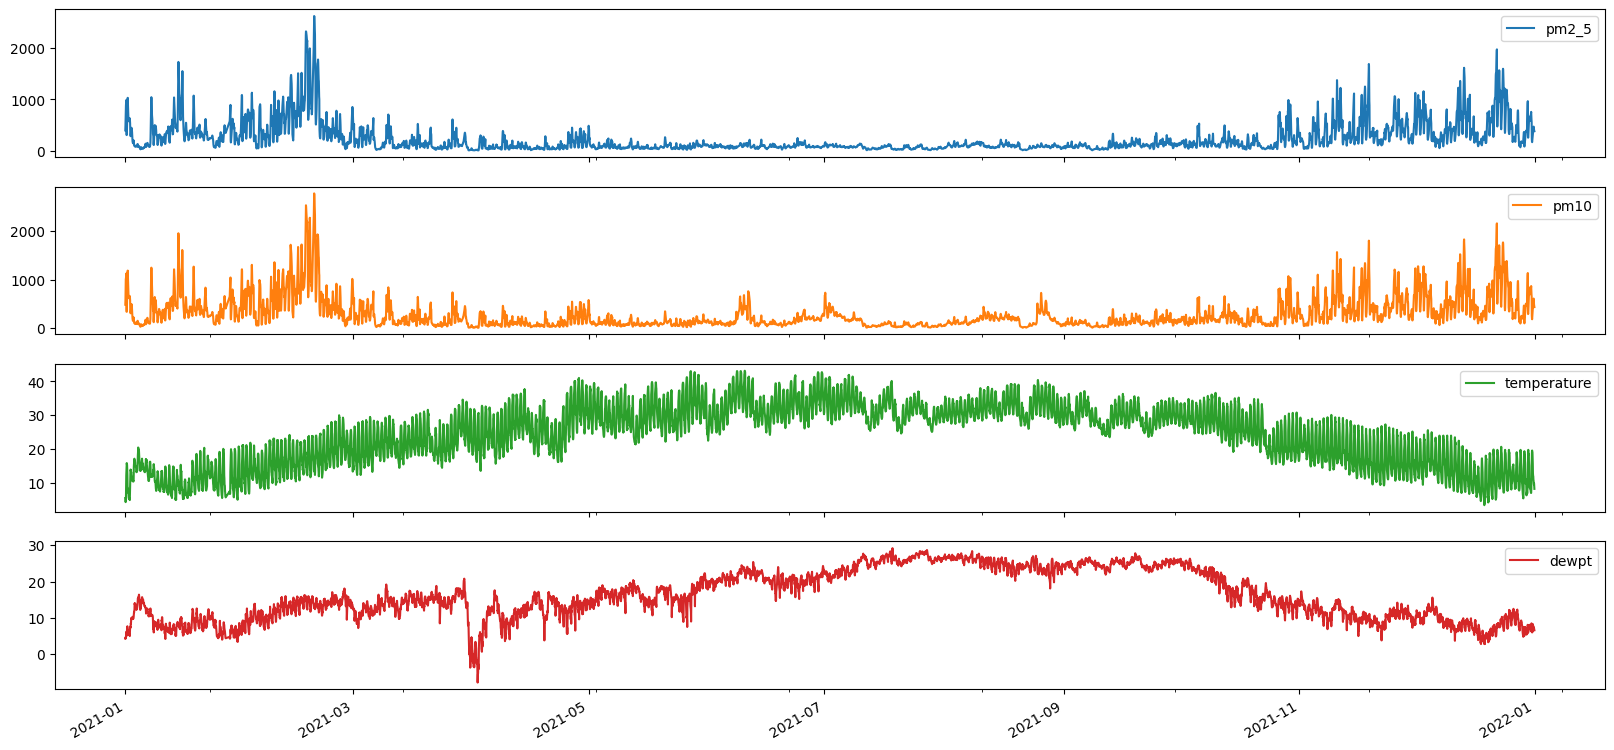

In [34]:
plot_cols = ['pm2_5','pm10','temperature','dewpt']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

In [40]:
# removing unnecessary columns
df=df.drop(['year','month','day','hour','zone','longitude','latitude'],axis=1)

,aqi,co,no,no2,o3,so2,pm2_5,pm10,nh3,temperature,dewpt
0,5,4058.84,30.40,42.16,0.00,9.78,395.20,484.22,26.35,5.6,4.3
90,5,5447.39,63.48,44.55,0.00,12.16,488.46,585.86,27.11,5.4,4.5
180,5,8117.68,135.90,48.67,0.00,16.69,658.20,779.81,33.44,4.4,4.4
270,5,11856.08,243.19,59.63,0.05,21.46,863.67,1015.06,39.52,5.3,4.8
360,5,12603.76,250.34,83.63,1.23,24.80,883.55,1027.48,41.54,5.7,4.6
...,...,...,...,...,...,...,...,...,...,...,...
785700,5,5126.95,54.09,70.60,0.00,17.40,468.69,611.31,49.14,10.7,7.4
785790,5,4699.71,45.60,62.38,0.00,12.76,454.02,578.06,37.49,10.1,7.4
785880,5,4005.43,32.19,53.47,0.00,7.99,422.81,520.86,25.59,9.6,7.1
785970,5,3631.59,22.13,48.67,0.01,5.42,402.86,480.65,19.00,9.9,7.1
